# (A1.5 Solución de problemas)         
                                                                                                       
Fernando Ariel Lozano Castillo


1. Primero importaremos los datos del archivo **Tiempo de entrega.csv**  en la variable `df`.
e imprimemos el tipo de dato de cada variable del data frame con la función `dtypes`   para checar si existen variables categóricas, además de las 5 primeras filas para checar las variables existentes.

In [71]:
# Importa la librería pandas
import pandas as pd
# Lee el archivo
df = pd.read_csv("Tiempo de entrega.csv")
display(df.head(5))
# Imprime el tipo de datos con que se cuenta
print(df.dtypes)

,Tiempo,Calificacion
0,85.076389,85.0
1,84.675556,85.0
2,79.553889,110.0
3,75.310556,110.0
4,64.958611,110.0


Tiempo          float64
Calificacion    float64
dtype: object


#### Gráfica intento 1 y casos de outliers
Generaremos una gráfica de dispersión que muestre el comportamiento de los datos. Y haré una línea de 
texto en la que generó una predicción sobre qué tipo de algoritmo será el más adecuado 
para resolver la tarea.

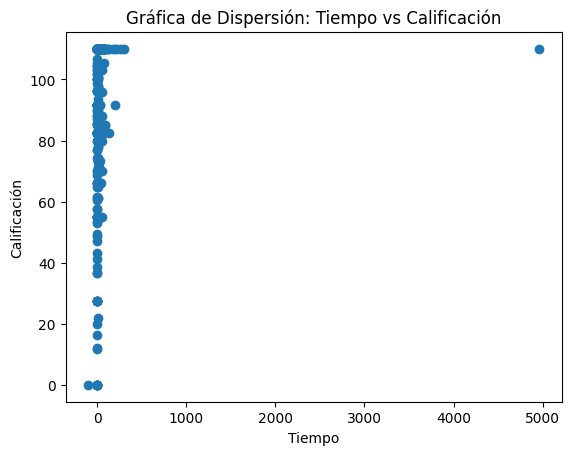

In [72]:
import matplotlib.pyplot as plt

# Gráfica de dispersión
plt.scatter(df.Tiempo, df.Calificacion)

# Etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Calificación')
plt.title('Gráfica de Dispersión: Tiempo vs Calificación')

# Mostrar la gráfica
plt.show()


Para lograr obtener esta gráfica se tuvieron que quitar las ultimas 3 observaciones directamente en el csv debido a que contaban con datos como `NaN, ?!`, por los cuales no se lograba obtener la gráfica. 

Ahora usare el método de Tukey, en el que se considera un *outlier* a cualquier obvservación fuera del rango de la ecuación mostrada en clase, con un valor de *k=3*. En la siguiente celda, encontraremos el cuartil uno y cuartil tres con la función `quantile` de pandas, definiremos el rango intercuartil como la diferencia de dichos valores, y especificaremos un límite inferior y superior e imprimiremos dichos valores. Primero para `calificacion` y luego para `Tiempo`

In [73]:
import numpy as np
# Cuartil uno
q1=df.Calificacion.quantile(0.25)
# Cuartil tres
q3=df.Calificacion.quantile(0.75)
# Rango intercuartil
iqr=q3-q1
# Límite inferior
li=q1-(3*iqr)
# Límite superior
ls=q3+(3*iqr)
# Observaciones fuera de cualquiera de los dos límites
out=np.where((df.Calificacion<li)|(df.Calificacion>=ls))[0]
# Imprimir información de outliers
print("Datos de los outliers")
display(df.iloc[out,:])

# Cuartil uno
q1=df.Tiempo.quantile(0.25)
# Cuartil tres
q3=df.Tiempo.quantile(0.75)
# Rango intercuartil
iqr=q3-q1
# Límite inferior
li=q1-(3*iqr)
# Límite superior
ls=q3+(3*iqr)
# Observaciones fuera de cualquiera de los dos límites
out=np.where((df.Tiempo<li)|(df.Tiempo>=ls))[0]
# Imprimir información de outliers
print("Datos de los outliers")
display(df.iloc[out,:])

print(out.shape)



Datos de los outliers


,Tiempo,Calificacion


Datos de los outliers


,Tiempo,Calificacion
0,85.076389,85.00000
1,84.675556,85.00000
2,79.553889,110.00000
3,75.310556,110.00000
4,64.958611,110.00000
5,58.157778,110.00000
6,56.238611,110.00000
7,55.903056,110.00000
8,52.465556,103.00000
9,51.998333,96.00000


(55,)


In [74]:
# Filtrar los datos donde el Tiempo es menor a 1
outliers_cerca_cierre = df[df.Tiempo < 0]
outlier_lejo=df[df.Tiempo >300]
# Mostrar los datos filtrados
print("Datos con Tiempo menor a 1 (entregas cercanas al cierre):")
display(outliers_cerca_cierre)
print(outlier_lejo)

Datos con Tiempo menor a 1 (entregas cercanas al cierre):


,Tiempo,Calificacion
107,-100.0,0.0


      Tiempo  Calificacion
29  4960.167         110.0


### Justificación para eliminar los outliers

En este análisis, hemos identificado y decidido eliminar dos tipos de outliers en la columna **"Tiempo"** debido a su naturaleza anómala. Estos outliers representan casos que no son relevantes para el análisis, ya que distorsionan los resultados y afectan la precisión del modelo. A continuación, se explica la razón de la eliminación de cada uno:

1. **Tiempo negativo (< 0 horas)**:
   - Un valor negativo en **"Tiempo"** indica que la entrega de la tarea fue registrada después del cierre de la bandeja, lo cual es un error, al menos que tuvieramos más información sobre si hay tiempo extra después del cierre. Este valor no tiene sentido y debe ser eliminado del conjunto de datos.

2. **Tiempo mayor a 300 horas (> 300 horas)**:
   - Un valor mayor a **300 horas** indica que la tarea fue entregada con una antelación **excesiva**, específicamente con **más de 12 días** antes de la fecha de cierre. Este tipo de entrega es inusual y podría ser el resultado de un error en la recolección de datos. El valor excede el rango razonable de entrega y debe eliminarse para evitar que distorsione el análisis.




In [75]:

# Filtrar los datos donde el Tiempo es menor a 0 o mayor a 300
df.drop(df[(df.Tiempo < 0) | (df.Tiempo > 300)].index, inplace=True)

# Verificar que los datos han sido eliminados correctamente
outliers_filtrados = df[(df.Tiempo < 0) | (df.Tiempo > 300)]

# Mostrar los resultados después de la eliminación
print("Datos con Tiempo menor a 0 o mayor a 300 (debería estar vacío):")
display(outliers_filtrados)

# Confirmar eliminación
if outliers_filtrados.empty:
    print("Los outliers han sido eliminados correctamente.")
else:
    print("Aún existen registros con Tiempo fuera del rango esperado.")


Datos con Tiempo menor a 0 o mayor a 300 (debería estar vacío):


,Tiempo,Calificacion


Los outliers han sido eliminados correctamente.


#### Gráfica intento2
Ahora que se quitaron los outlier gráficaremos de nuevo

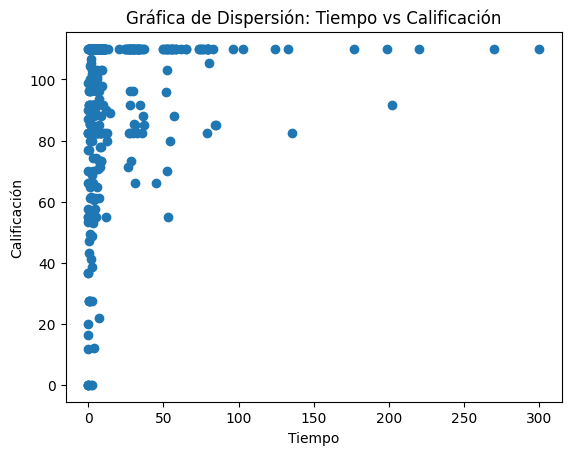

In [76]:
# Gráfica de dispersión
plt.scatter(df.Tiempo, df.Calificacion)

# Etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Calificación')
plt.title('Gráfica de Dispersión: Tiempo vs Calificación')

# Mostrar la gráfica
plt.show()

#### Separación de Datos en Entrenamiento y Prueba

2. Ahora separamos los datos en dos conjuntos: uno de entrenamiento y uno de prueba, con una relación de 70% para entrenamiento y 30% para prueba. Utilizando esta separación para poder entrenar y evaluar el modelo de forma efectiva.

- Una vez separados los datos, calcularé el promedio de los tiempos y calificaciones tanto en el conjunto de entrenamiento como en el conjunto de prueba. Esto me permitirá comparar cómo se distribuyen estos valores en ambos conjuntos.

- Después de obtener los promedios, imprimiré los resultados en consola y realizaré un análisis sobre la similitud o diferencia entre los promedios de los conjuntos de entrenamiento y prueba. Si los promedios son similares, esto indicará que la distribución de los datos es equilibrada, lo que facilitará un buen desempeño del modelo. Sin embargo, si hay una diferencia significativa, podría haber un sesgo en los datos, lo cual podría afectar el análisis y la capacidad de generalización del modelo.


In [77]:
# Importar función
from sklearn.model_selection import train_test_split
# Generar subconjuntos de prueba y entrenamiento para X e Y
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Calificacion",axis=1),df.Calificacion,train_size = 0.7, random_state=30)

In [78]:
# Calcular el promedio de Tiempo y Calificación en el conjunto de entrenamiento
promedio_tiempo_train = X_train['Tiempo'].mean()
promedio_calificacion_train = Y_train.mean()

# Calcular el promedio de Tiempo y Calificación en el conjunto de prueba
promedio_tiempo_test = X_test['Tiempo'].mean()
promedio_calificacion_test = Y_test.mean()

# Imprimir los resultados
print(f"Promedio de Tiempo en el conjunto de entrenamiento: {promedio_tiempo_train:.2f} horas")
print(f"Promedio de Calificación en el conjunto de entrenamiento: {promedio_calificacion_train:.2f}")

print(f"Promedio de Tiempo en el conjunto de prueba: {promedio_tiempo_test:.2f} horas")
print(f"Promedio de Calificación en el conjunto de prueba: {promedio_calificacion_test:.2f}")

Promedio de Tiempo en el conjunto de entrenamiento: 17.94 horas
Promedio de Calificación en el conjunto de entrenamiento: 93.62
Promedio de Tiempo en el conjunto de prueba: 17.66 horas
Promedio de Calificación en el conjunto de prueba: 98.11


Las diferencias entre los tiempos fue de 4.26 mientras que en calificación fueron de 4.4. 

Lo cual muestra que no son diferencias tan significativas pero podría haber cambios en el valor de RSE medido en datos de entrenamiento y en datos de prueba, debido a esta diferencia además de tomar en cuenta que puede haber un sesgo porque los datos de prueba tienen mayor rango de valores que en los de entrenamiento por lo cual el modelo puede tener problemas por su entrenamiento con un rango más concentrado de datos.           

### Entrenamiento Modelo polinomial
3. Ahora entrenamos un modelo de regresión polinomial usando los datos de entrenamiento; usando 
usar el orden de polinomial que considere más adecuado. Imprimos un resumen de los 
resultados obtenidos y agregamos una línea de texto en la que comento sobre el tipo de 
relación (positiva o negativa; ¿a menor tiempo menor calificación?) entre el término lineal 
y la respuesta, lo que esto significa y si dicha variable está significativamente asociada 
con las calificaciones. 


Usaremos la función `PolynomialFeatures` de la librería sklearn.preprocessing; en esta ocasión, solo necesitaremos definir como parámetro `degree=2`. En la misma línea de código realizaremos el ajuste de datos, para los datos de entrenamiento, con la función `fit`.




In [79]:
import statsmodels.api as sm
# Cambiar la forma de los datos
Xtemp_train = X_train.to_numpy().reshape(-1,1)
Xtemp_test = X_test.to_numpy().reshape(-1,1)
# Importar la librería
from sklearn.preprocessing import PolynomialFeatures
# Generar polinomiales de grado 2 y ajustar los datos respecto a las variables mas falta agregarlos a dichas variables
polyq_train = PolynomialFeatures(degree=2).fit(Xtemp_train)
polyq_test = PolynomialFeatures(degree=2).fit(Xtemp_test)
# Transformar los datos para que incluyan el polinomial de segundo orden
Xq_train = pd.DataFrame(polyq_train.transform(Xtemp_train))
Xq_test = pd.DataFrame(polyq_test.transform(Xtemp_test))
# Generar y entrenar modelo
mq = sm.OLS(list(Y_train),Xq_train).fit()   #modelo no lineal, polinomio de 2 grado
# Imprimir resultados
print(mq.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     10.06
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           5.96e-05
Time:                        23:09:19   Log-Likelihood:                -1377.1
No. Observations:                 298   AIC:                             2760.
Df Residuals:                     295   BIC:                             2771.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             88.9685      1.771     50.245      0.0

Es positivo e indica que la calificación incrementa en 0.2907 puntos por cada hora de anterioridad a la hora de cierre. Su p-valor menor a 0.001 confirma que está significativamente asociado con la calificación. Por otro lado, el término cuadrático de -0.0009 es negativo, lo que sugiere que hay un punto en el que la calificación comienza a disminuir por cada hora adicional de anterioridad.



### Entrenamiento modelo segmentado
4. Ahora entrenaremos un modelo de regresión segmentada, utilizando regresiones cuadráticas para cada segmento. Y generamos estimaciones(predicciones) en los datos de validación.Hay múltiples formas de llevar a cabo este proceso, pero yo recomiendo usar la función `PiecewiseRegressor` de la librería mlinsights.mlmodel.

In [80]:
# Importar función
from mlinsights.mlmodel import PiecewiseRegressor
# Generar y entrenar modelo usando el término lineal y el cuadrático
ms = PiecewiseRegressor('bins').fit(Xq_train.iloc[:,1:],Y_train)

### Entrenamiento modelo no parámetrico (KNN)
Dicho modelo no asume ningún tipo de relación entre la variable de entrada y la de salida. Usaremos la función `KNeighbotsRegressor` de sklearn.neighbors para generar el modelo, y la función `fit` para entrenarlo. Probaremos en este caso con 15 vecinos.

In [81]:
# Importar librerías
from sklearn.neighbors import KNeighborsRegressor as KNN


# Definir los valores de k a probar
k_values = [1, 5, 10, 15, 20]
models = {}

# Entrenar modelos con diferentes valores de k
for k in k_values:
    # Entrenar el modelo KNN con el valor de k
    models[k] = KNN(n_neighbors=k).fit(Xtemp_train, Y_train)
    
    # Estimar el valor de Y en los datos de prueba
    yHat_mk = models[k].predict(Xtemp_test)
    
    # Calcular RSS (Residual Sum of Squares)
    RSS_mk = sum((list(Y_test) - yHat_mk)**2)
    
    # Calcular RSE (Raíz del Error Cuadrático Medio)
    RSE_mk = np.sqrt(RSS_mk / (len(Y_test)-1))  # Manteniendo el cálculo como lo proporcionaste
    
    # Imprimir el valor de RSE para la iteración actual
    print(f"RSE para k={k}: {RSE_mk}")



RSE para k=1: 24.336938373138757
RSE para k=5: 20.075513758592294
RSE para k=10: 18.816926813577176
RSE para k=15: 18.78105375278339
RSE para k=20: 19.022347225464287


Nos quedaremos con k=15 por su RSE menor

In [85]:

mk = KNN(n_neighbors=15).fit(Xtemp_train,Y_train)

#### RSE Polinomial , Segmentado , no párametrico
6. Calculamos el RSE en los datos de prueba para los 3 modelos y agregamos una línea de texto donde comento sobre sus diferencias y si hay un claro “ganador”. No te bases 
exclusivamente en el error, puedes considerar también aspectos como la interpretabilidad 
del modelo. 

In [86]:
# Estimar el valor de Y en los datos de prueba
yHat_mq = mq.predict(Xq_test)
# Calcular RSS
RSS_mq = sum((list(Y_test)-yHat_mq)**2)
# Calcular RSE
RSE_MODELOPOLI = np.sqrt(RSS_mq/len(Y_test)-1)



# Estimar el valor de Y en los datos de prueba
yHat_ms = ms.predict(Xq_test.iloc[:,1:])
# Calcular RSS
RSS_ms = sum((list(Y_test)-yHat_ms)**2)
# Calcular RSE
RSE_SEG = np.sqrt(RSS_ms/(len(Y_test)-1))


yHat_mk = mk.predict(Xtemp_test)
RSS_mk = sum((list(Y_test)-yHat_mk)**2)
RSE_mk = np.sqrt(RSS_mk/(len(Y_test)-1))


rse_results = pd.DataFrame({
    'Modelo': ['Polinomial', 'Segmentado', 'No Paramétrico'],
    'RSE': [RSE_MODELOPOLI, RSE_SEG, RSE_mk]
})

# Imprimir la tabla
display(rse_results)

,Modelo,RSE
0,Polinomial,19.565400
1,Segmentado,18.586632
2,No Paramétrico,18.781054


El modelo segmentado se destaca por tener una menor tasa de error cuadrático medio (RSE), lo que lo hace más preciso en términos de predicción. Esto lo convierte en la opción preferida cuando se busca una mayor exactitud en los resultados, especialmente en datos complejos o con relaciones no lineales.

En cuanto a la interpretabilidad, esta depende del contexto, el problema y las variables involucradas. Además, la complejidad del problema juega un papel crucial, ya que un modelo puede ser más interpretable en problemas más simples, pero a medida que el problema crece y abarca más variables, tanto los modelos segmentados , no paramétricos y los polinomiales pueden volverse más difíciles de explicar debido a las interacciones y relaciones más complejas.

## Gráficas
7. Ahora gráficaremos los 3 modelos en un mismo plot.


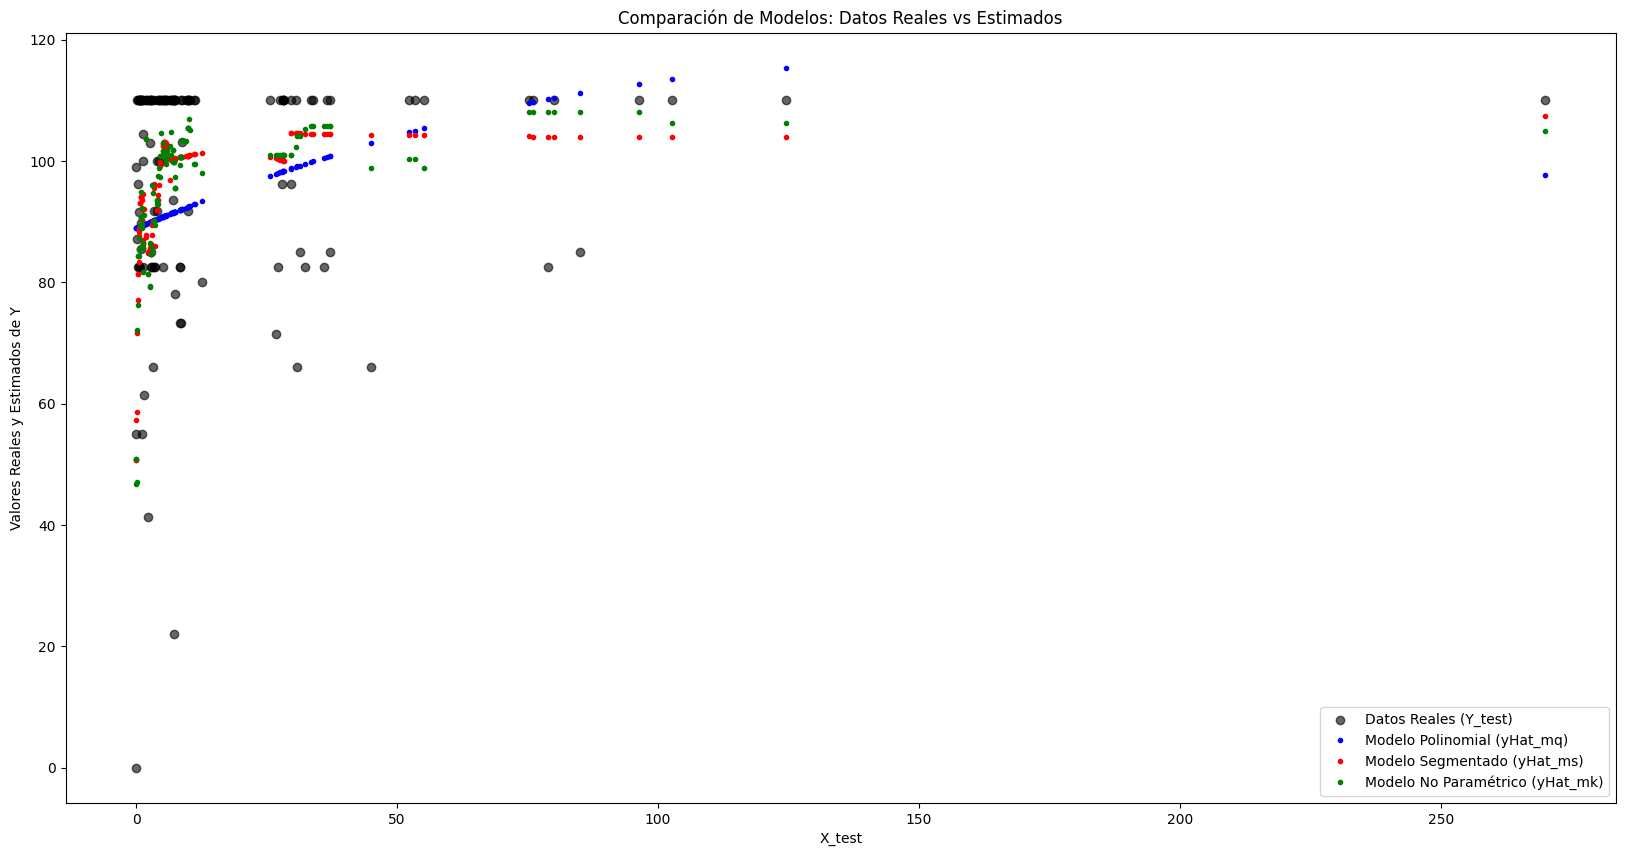

In [87]:
# Crear el gráfico
plt.figure(figsize=(20, 10))

# Graficar los valores reales
plt.scatter(X_test, Y_test, color='black', alpha=0.6, label='Datos Reales (Y_test)')

# Graficar los valores estimados de cada modelo
plt.plot(X_test, yHat_mq, "b.", label="Modelo Polinomial (yHat_mq)")
plt.plot(X_test, yHat_ms, "r.", label="Modelo Segmentado (yHat_ms)")
plt.plot(X_test, yHat_mk, "g.", label="Modelo No Paramétrico (yHat_mk)")

# Etiquetas y título
plt.xlabel('X_test')
plt.ylabel('Valores Reales y Estimados de Y')
plt.title('Comparación de Modelos: Datos Reales vs Estimados')
plt.legend()  # Mostrar leyenda

# Mostrar el gráfico
plt.show()

**Doy mi palabra que he realizado esta actividad con integridad académica**